In [1]:
# Import Basic Packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import seaborn as sns

In [107]:
df = pd. read_pickle('Interview_Data_2022.pkl')
df

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
2016-01-01 07:24:00-07:00,9.807612,1.301536,NaN,NaN
2016-01-01 07:25:00-07:00,9.907775,3.096331,NaN,NaN
2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365
2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467
2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205
...,...,...,...,...
2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031
2020-12-31 16:42:00-07:00,2.102146,9.810486,5.509629,-0.69169
2020-12-31 16:43:00-07:00,2.094691,9.284071,5.293106,-0.691843
2020-12-31 16:44:00-07:00,1.897676,9.303919,NaN,NaN


In [108]:
df.index.name = 'datetime' #naming the index column as datetime
#check out the information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337487 entries, 2016-01-01 07:24:00-07:00 to 2020-12-31 16:45:00-07:00
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Ambient Temperature (C)  1337487 non-null  float64
 1   Wind Speed (m/s)         1337487 non-null  float64
 2   POA Irradiance (w/m^2)   1329517 non-null  float64
 3   Power (kw)               1329531 non-null  object 
dtypes: float64(3), object(1)
memory usage: 51.0+ MB


In [109]:
#converting Power (kw) column to float64 dtype.
df['Power (kw)'] = df['Power (kw)'].astype(float, errors = 'raise') 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1337487 entries, 2016-01-01 07:24:00-07:00 to 2020-12-31 16:45:00-07:00
Data columns (total 4 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   Ambient Temperature (C)  1337487 non-null  float64
 1   Wind Speed (m/s)         1337487 non-null  float64
 2   POA Irradiance (w/m^2)   1329517 non-null  float64
 3   Power (kw)               1329531 non-null  float64
dtypes: float64(4)
memory usage: 51.0 MB


In [111]:
df1 = df.reset_index()
df1['hour'] = df1['datetime'].dt.hour
df1

,datetime,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw),hour
0,2016-01-01 07:24:00-07:00,9.807612,1.301536,NaN,NaN,7
1,2016-01-01 07:25:00-07:00,9.907775,3.096331,NaN,NaN,7
2,2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365,7
3,2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467,7
4,2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205,7
...,...,...,...,...,...,...
1337482,2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031,16
1337483,2020-12-31 16:42:00-07:00,2.102146,9.810486,5.509629,-0.691690,16
1337484,2020-12-31 16:43:00-07:00,2.094691,9.284071,5.293106,-0.691843,16
1337485,2020-12-31 16:44:00-07:00,1.897676,9.303919,NaN,NaN,16


In [19]:
Small_P= df[df['Power (kw)'].between(-1,0, inclusive = False)]
Small_P

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365
2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467
2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205
2016-01-01 07:29:00-07:00,9.992343,3.699786,7.965980,-0.692133
2016-01-01 07:30:00-07:00,9.914239,4.101297,12.026873,-0.692282
...,...,...,...,...
2020-12-31 16:39:00-07:00,2.098541,12.504442,7.199130,-0.690718
2020-12-31 16:40:00-07:00,2.198845,11.800889,6.605362,-0.691356
2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031


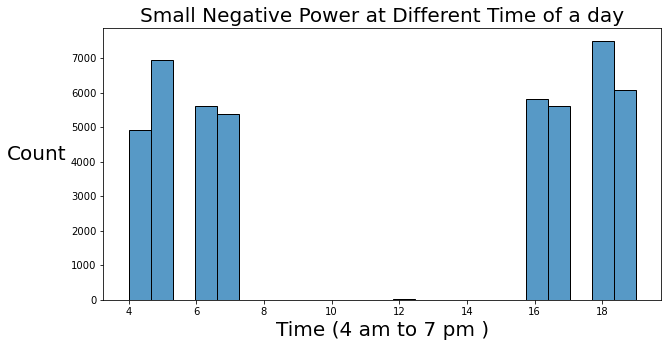

In [20]:
#Checking occurange of small negative value at time of day
df5= Small_P.reset_index()
import datetime as dt
# create utc_timestamp as a column and another hour column
df5['datetime'] = pd.to_datetime(df5['datetime']).apply(lambda x: dt.datetime.strftime(x,'%Y-%m-%d %H:%M:%S'))
df5['datetime']=pd.to_datetime(df5['datetime'])
df5['hour'] = df5['datetime'].dt.hour

# Create a histogram of the count of negative values at different time

plt.figure(figsize=(10,5))
sns.histplot(df5['hour'])

plt.title('Small Negative Power at Different Time of a day',fontsize=20)

plt.xlabel('Time (4 am to 7 pm )', fontsize=20)

plt.ylabel("Count",rotation='0',ha='right', fontsize=20)
plt.show()

In [21]:
df5

,datetime,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw),hour
0,2016-01-01 07:26:00,9.984213,3.999132,4.704255,-0.691365,7
1,2016-01-01 07:27:00,10.004195,4.800663,5.450435,-0.691467,7
2,2016-01-01 07:28:00,10.100915,5.901452,6.617401,-0.692205,7
3,2016-01-01 07:29:00,9.992343,3.699786,7.965980,-0.692133,7
4,2016-01-01 07:30:00,9.914239,4.101297,12.026873,-0.692282,7
...,...,...,...,...,...,...
47864,2020-12-31 16:39:00,2.098541,12.504442,7.199130,-0.690718,16
47865,2020-12-31 16:40:00,2.198845,11.800889,6.605362,-0.691356,16
47866,2020-12-31 16:41:00,2.199453,10.602189,6.000877,-0.692031,16
47867,2020-12-31 16:42:00,2.102146,9.810486,5.509629,-0.691690,16


In [30]:
df6 = df5.loc[df5['hour'].isin([4,5,6,7,16,17,18,19])]

In [34]:
df6.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),47851.0,11.189274,9.715744,-24.574250,4.498649,11.989939,18.832476,31.934218
Wind Speed (m/s),47851.0,3.353523,2.589468,0.000000,1.697408,2.702214,4.203250,28.875421
POA Irradiance (w/m^2),47851.0,12.303569,33.822262,0.000000,4.493059,7.601382,12.184819,527.000000
Power (kw),47851.0,-0.689480,0.028980,-0.695012,-0.692386,-0.691920,-0.691444,-0.344931
hour,47851.0,11.795177,6.117853,4.000000,6.000000,16.000000,18.000000,19.000000


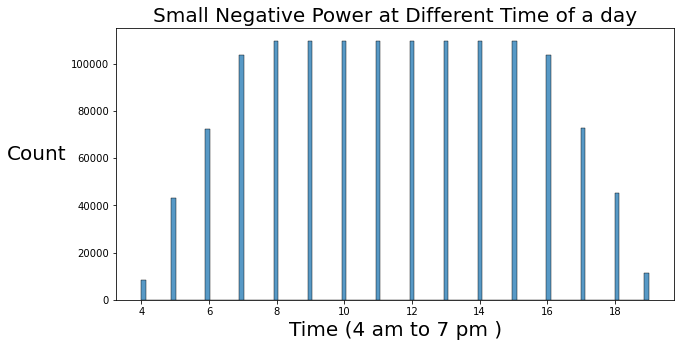

In [25]:
#Lets check on whole dataset
#Checking occurange of small negative value at time of day
df7= df.reset_index()
import datetime as dt
# create utc_timestamp as a column and another hour column
df7['datetime'] = pd.to_datetime(df7['datetime']).apply(lambda x: dt.datetime.strftime(x,'%Y-%m-%d %H:%M:%S'))
df7['datetime']=pd.to_datetime(df7['datetime'])
df7['hour'] = df7['datetime'].dt.hour

# Create a histogram of the count of negative values at different time

plt.figure(figsize=(10,5))
sns.histplot(df7['hour'])

plt.title('Small Negative Power at Different Time of a day',fontsize=20)

plt.xlabel('Time (4 am to 7 pm )', fontsize=20)

plt.ylabel("Count",rotation='0',ha='right', fontsize=20)
plt.show()

In [32]:
df8 = df7.loc[df7['hour'].isin([4,5,6,7,16,17,18,19])]

In [33]:
df8.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),460527.0,14.755040,9.302168,-26.896399,8.583635,15.877266,21.946804,38.321678
Wind Speed (m/s),460527.0,3.236681,2.525665,-3.200789,1.598857,2.597635,4.098175,29.676466
POA Irradiance (w/m^2),452557.0,310.917554,348.870616,-472.063593,31.507229,122.566736,570.354591,1424.136372
Power (kw),452571.0,819.973737,896.797998,-2303.267095,69.505023,333.390961,1708.577230,2315.655559
hour,460527.0,11.580491,5.399580,4.000000,6.000000,16.000000,17.000000,19.000000


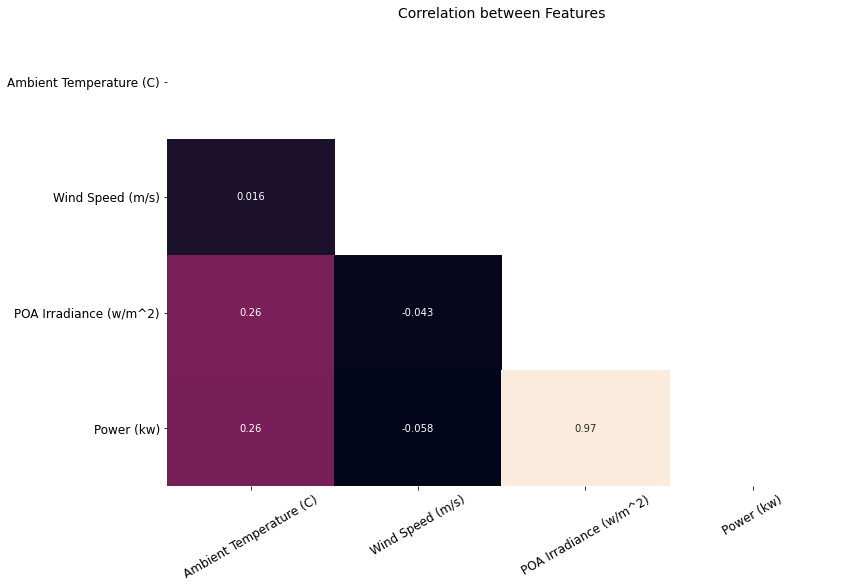

In [35]:
#Lokking at the correlation of different features of dataset. 
#developing function to get customized heatmap
def correlation_heat_map(df, title, size):
    """DOCSTRING
    This function plots a correlation heatmap for a dataframe, masking duplicate values.
    """
    corrs = df.corr()
    
    # set figure size
    fig, ax = plt.subplots(figsize = size)
    
    # generate a mask for the upper triagle 
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    #plot heatmap
    ax = sns.heatmap(corrs, mask=mask, annot = True, cbar=False)
    
    #resize labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    ax.set_title(title, fontsize=14)
    
    plt.show()
correlation_heat_map(df8[['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)','Power (kw)']], 'Correlation between Features', (12,8.5))

In [37]:
df9 = df8.dropna()

Populating the interactive namespace from numpy and matplotlib
0.9459421479099481
2.5001059705087236
42.744410916700986
0.0
0.0008884466500100547


<ipython-input-38-350f2d8eb3ce>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


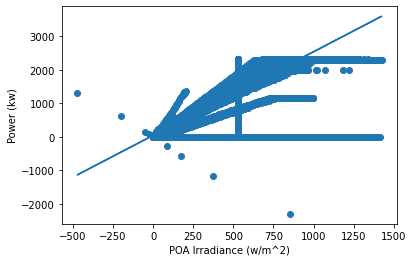

In [38]:
#Lets check the R2 value by making linear model for each feature with Power
import scipy.stats
%pylab inline
m, b, r_value, p_value, std_err = scipy.stats.linregress(df9['POA Irradiance (w/m^2)'], df9['Power (kw)'])

fig, ax = plt.subplots()
ax.scatter(df9['POA Irradiance (w/m^2)'],df9['Power (kw)'])
ax.plot(df9['POA Irradiance (w/m^2)'], m*df9['POA Irradiance (w/m^2)'] + b)
#ax.annotate('r^2: ' + str("{:.2f}".format(r_value**2)), xy=(1950,19500))
#ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(1950,18500))
ax.set_xlabel("POA Irradiance (w/m^2)")
ax.set_ylabel("Power (kw)")
fig.show()

print(r_value**2)
print(m)
print(b)
print(p_value)
print(std_err)

In [42]:
df8.head(60)

,datetime,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw),hour
0,2016-01-01 07:24:00,9.807612,1.301536,NaN,NaN,7
1,2016-01-01 07:25:00,9.907775,3.096331,NaN,NaN,7
2,2016-01-01 07:26:00,9.984213,3.999132,4.704255,-0.691365,7
3,2016-01-01 07:27:00,10.004195,4.800663,5.450435,-0.691467,7
4,2016-01-01 07:28:00,10.100915,5.901452,6.617401,-0.692205,7
5,2016-01-01 07:29:00,9.992343,3.699786,7.965980,-0.692133,7
6,2016-01-01 07:30:00,9.914239,4.101297,12.026873,-0.692282,7
7,2016-01-01 07:31:00,9.903265,4.102013,18.974673,-0.691322,7
8,2016-01-01 07:32:00,10.011466,3.702632,24.522087,-0.690895,7
9,2016-01-01 07:33:00,10.004281,3.202484,23.882122,-0.691231,7


In [45]:
len(df8['POA Irradiance (w/m^2)'])

460527

In [46]:
len(df8['Power (kw)'])

460527

In [101]:
Small_Power= df[df['Power (kw)'].between(0,100)]
Small_Power

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-01-01 07:39:00-07:00,9.002255,2.500149,12.936129,0.861401
2016-01-01 07:40:00-07:00,8.996669,2.895838,13.608054,8.272520
2016-01-01 07:41:00-07:00,9.106908,2.403802,14.376006,14.983253
2016-01-01 07:42:00-07:00,9.203936,3.695459,15.455331,21.708371
2016-01-01 07:43:00-07:00,9.197455,2.999468,16.794129,28.011696
...,...,...,...,...
2020-12-31 16:25:00-07:00,2.201156,11.578501,15.107673,22.438004
2020-12-31 16:26:00-07:00,2.103948,11.708075,14.459017,18.508213
2020-12-31 16:27:00-07:00,2.097064,10.790878,13.788398,14.071687


In [97]:
Small_Power.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Ambient Temperature (C),335258.0,11.579023,10.160052,-23.921449,4.307016,11.815528,19.616208,37.248041
Wind Speed (m/s),335258.0,3.538966,2.737273,-3.200789,1.700904,2.802345,4.496918,30.055129
POA Irradiance (w/m^2),335220.0,90.011424,119.361498,-49.335975,34.578889,69.910641,114.660665,1410.996625
Power (kw),335258.0,204.478711,143.730825,0.000000,78.239853,185.586878,318.307194,499.999841


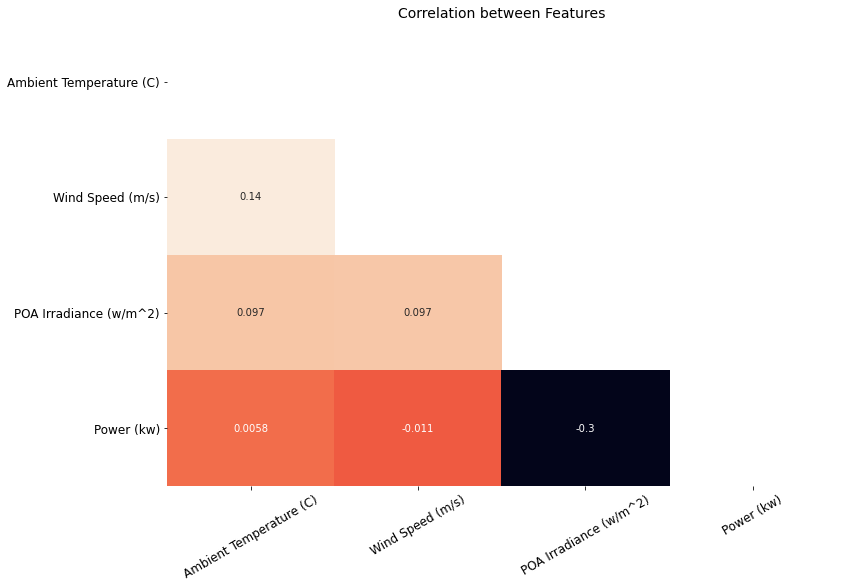

In [102]:
#Lokking at the correlation of different features of dataset. 
#developing function to get customized heatmap
def correlation_heat_map(df, title, size):
    """DOCSTRING
    This function plots a correlation heatmap for a dataframe, masking duplicate values.
    """
    corrs = df.corr()
    
    # set figure size
    fig, ax = plt.subplots(figsize = size)
    
    # generate a mask for the upper triagle 
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    
    #plot heatmap
    ax = sns.heatmap(corrs, mask=mask, annot = True, cbar=False)
    
    #resize labels
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)
    ax.set_title(title, fontsize=14)
    
    plt.show()
correlation_heat_map(Small_Power[['Ambient Temperature (C)', 'Wind Speed (m/s)', 'POA Irradiance (w/m^2)','Power (kw)']], 'Correlation between Features', (12,8.5))

Populating the interactive namespace from numpy and matplotlib
0.23124257830449418
-0.00907327581595906
8.297495168280992
0.0
9.700248775255558e-05


<ipython-input-77-64a64a3ef127>:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


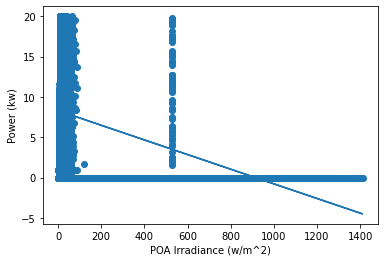

In [77]:
#Lets check the R2 value by making linear model for each feature with Power
import scipy.stats
%pylab inline
m, b, r_value, p_value, std_err = scipy.stats.linregress(Small_Power['POA Irradiance (w/m^2)'], Small_Power['Power (kw)'])

fig, ax = plt.subplots()
ax.scatter(Small_Power['POA Irradiance (w/m^2)'],Small_Power['Power (kw)'])
ax.plot(Small_Power['POA Irradiance (w/m^2)'], m*Small_Power['POA Irradiance (w/m^2)'] + b)
#ax.annotate('r^2: ' + str("{:.2f}".format(r_value**2)), xy=(1950,19500))
#ax.annotate('formula: ' + str("{:.2f}".format(m)) + 'x + ' + str("{:.2f}".format(b)), xy=(1950,18500))
ax.set_xlabel("POA Irradiance (w/m^2)")
ax.set_ylabel("Power (kw)")
fig.show()

print(r_value**2)
print(m)
print(b)
print(p_value)
print(std_err)

In [112]:
df

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw)
datetime,,,,
2016-01-01 07:24:00-07:00,9.807612,1.301536,NaN,NaN
2016-01-01 07:25:00-07:00,9.907775,3.096331,NaN,NaN
2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365
2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467
2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205
...,...,...,...,...
2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031
2020-12-31 16:42:00-07:00,2.102146,9.810486,5.509629,-0.691690
2020-12-31 16:43:00-07:00,2.094691,9.284071,5.293106,-0.691843


In [113]:
df['Year'] = df.index.year
df

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw),Year
datetime,,,,,
2016-01-01 07:24:00-07:00,9.807612,1.301536,NaN,NaN,2016
2016-01-01 07:25:00-07:00,9.907775,3.096331,NaN,NaN,2016
2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365,2016
2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467,2016
2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205,2016
...,...,...,...,...,...
2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031,2020
2020-12-31 16:42:00-07:00,2.102146,9.810486,5.509629,-0.691690,2020
2020-12-31 16:43:00-07:00,2.094691,9.284071,5.293106,-0.691843,2020


In [114]:
df1 = df

In [115]:
df1['Months'] = df1.index.month
df1

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw),Year,Months
datetime,,,,,,
2016-01-01 07:24:00-07:00,9.807612,1.301536,NaN,NaN,2016,1
2016-01-01 07:25:00-07:00,9.907775,3.096331,NaN,NaN,2016,1
2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365,2016,1
2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467,2016,1
2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205,2016,1
...,...,...,...,...,...,...
2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031,2020,12
2020-12-31 16:42:00-07:00,2.102146,9.810486,5.509629,-0.691690,2020,12
2020-12-31 16:43:00-07:00,2.094691,9.284071,5.293106,-0.691843,2020,12


In [116]:
df

,Ambient Temperature (C),Wind Speed (m/s),POA Irradiance (w/m^2),Power (kw),Year,Months
datetime,,,,,,
2016-01-01 07:24:00-07:00,9.807612,1.301536,NaN,NaN,2016,1
2016-01-01 07:25:00-07:00,9.907775,3.096331,NaN,NaN,2016,1
2016-01-01 07:26:00-07:00,9.984213,3.999132,4.704255,-0.691365,2016,1
2016-01-01 07:27:00-07:00,10.004195,4.800663,5.450435,-0.691467,2016,1
2016-01-01 07:28:00-07:00,10.100915,5.901452,6.617401,-0.692205,2016,1
...,...,...,...,...,...,...
2020-12-31 16:41:00-07:00,2.199453,10.602189,6.000877,-0.692031,2020,12
2020-12-31 16:42:00-07:00,2.102146,9.810486,5.509629,-0.691690,2020,12
2020-12-31 16:43:00-07:00,2.094691,9.284071,5.293106,-0.691843,2020,12
